<a href="https://colab.research.google.com/github/kjedrzejczak/Machine_Learning_Bootcamp_practice/blob/main/15_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


sns.set(font_scale=1.3)
np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

feature_names = all_data['feature_names']
target_names = all_data['target_names']

In [3]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
data = data[:, [0, 1]]  # wycinanie dwóch pierwszych kolumn
target = df['target'].apply(int).values

In [7]:
data.shape

(150, 2)

In [8]:
target.shape

(150,)

In [9]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(data, target)

RandomForestClassifier(random_state=42)

In [10]:
classifier.score(data, target)

0.9266666666666666

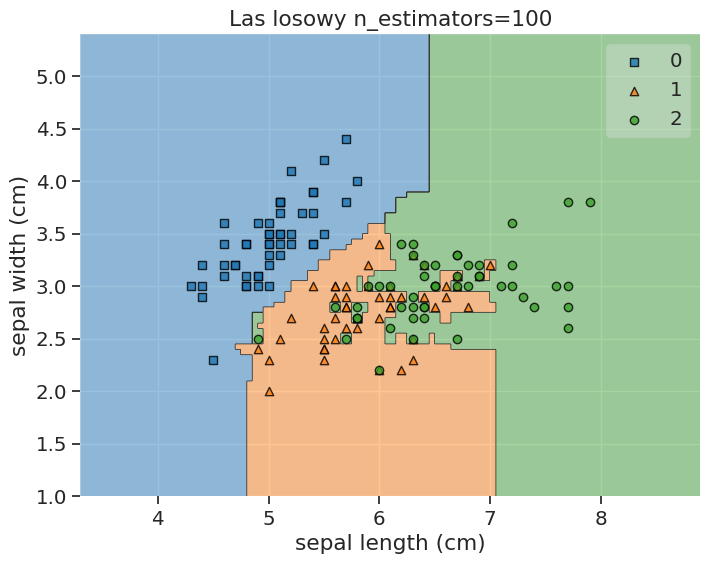

In [11]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(data, target, classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Las losowy n_estimators=100')
plt.show()



### Wszystkie cechy

In [12]:
data = all_data['data']
target = all_data['target']

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [14]:
X_train.shape

(112, 4)

In [15]:
X_test.shape

(38, 4)

In [16]:
y_train.shape

(112,)

In [17]:
y_test.shape

(38,)

In [18]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

accuracy_score(y_pred, y_test)

1.0

In [20]:
classifier.feature_importances_  # ważność każdej cechy

array([0.10968334, 0.02954459, 0.43763486, 0.42313721])

In [22]:
features = pd.DataFrame(data={'feature':feature_names, 'feature_importance' : classifier.feature_importances_ })

px.bar(features, x='feature', y='feature_importance', width=700, height=400)